In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os

os.chdir('C:\\Users\\rthiago\\OneDrive\\IA Expert\\Segmentação\\Imagens')



Função para mostrar a imagem de forma grande e sem os eixos

In [2]:
def mostrar(imagem):
    fig = plt.gcf()
    fig.set_size_inches(18,6)
    plt.imshow(imagem, cmap='gray')
    plt.axis('off')
    plt.show()

Função para aplicar o filtro de Otsu

In [3]:
def filtro_otsu(imagem):
    valor, otsu = cv.threshold(imagem, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    print("Valor do limiar: ", valor)
    mostrar(otsu)

Função para mostrar todos os tipos de limiarização

In [4]:
def exibir_lim(img, limiar = 127):
    _, thresh_binary = cv.threshold(gray, limiar, 255, cv.THRESH_BINARY)
    _, thresh_binary_inv = cv.threshold(gray, limiar, 255, cv.THRESH_BINARY_INV)
    _, thresh_trunc = cv.threshold(gray, limiar, 255, cv.THRESH_TRUNC)
    _, thresh_to_zero = cv.threshold(gray, limiar, 255, cv.THRESH_TOZERO)
    _, thresh_to_zero_inv = cv.threshold(gray, limiar, 255, cv.THRESH_TOZERO_INV)

    titulos = ['imagem original', 'Binary', 'Binary Inv', 'Trunc', 'To Zero', 'To Zero Inv']
    imagens = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_to_zero, thresh_to_zero_inv]

    fig = plt.gcf()
    fig.set_size_inches(18,12)
    for i in range(6):
        plt.subplot(2,3, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

O OpenCV trabalha por padrão como BGR e não como RGB, portanto ao printar a imagem ela tem as cores de forma distorcida.

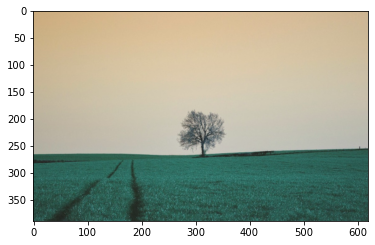

In [9]:
img = cv.imread('paisagem01.jpg')
plt.imshow(img); #BGR

Para converter usamos a funcção cv.cvtColor

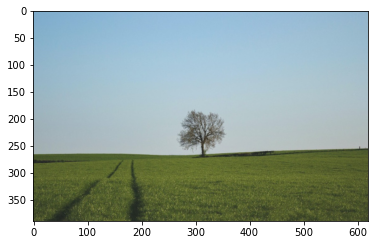

In [10]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(rgb);

Para reduzir a quantidade de informação da imagem, convertemos para escala de cinza usando o mesmo comando anterior porém com o parâmetro cv.COLOR_BGR2GRAY

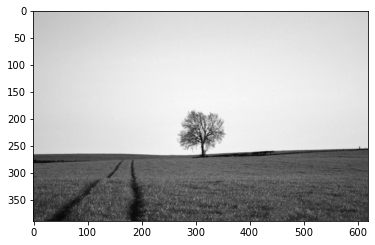

In [11]:
gray = cv.cvtColor(rgb, cv.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray');

Para fazermos a limiarização da imagem podemos utilizar o comando cv.threshhold

In [ ]:
limiar = 140  # 0 - 255

Tipos de Limiarização

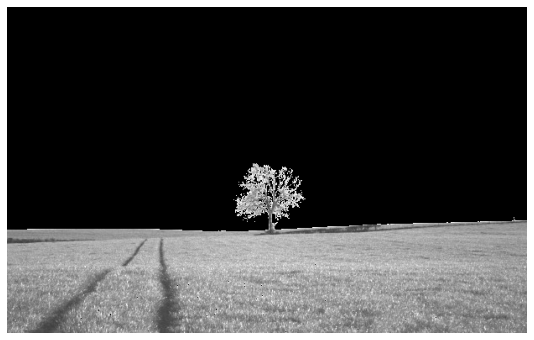

In [41]:

#_, thresh = cv.threshold(gray, limiar, 255, cv.THRESH_BINARY)
#_, thresh = cv.threshold(gray, limiar, 255, cv.THRESH_BINARY_INV)
#_, thresh = cv.threshold(gray, limiar, 255, cv.THRESH_TRUNC)
#_, thresh = cv.threshold(gray, limiar, 255, cv.THRESH_TOZERO)
_, thresh = cv.threshold(gray, limiar, 255, cv.THRESH_TOZERO_INV)
mostrar(thresh)

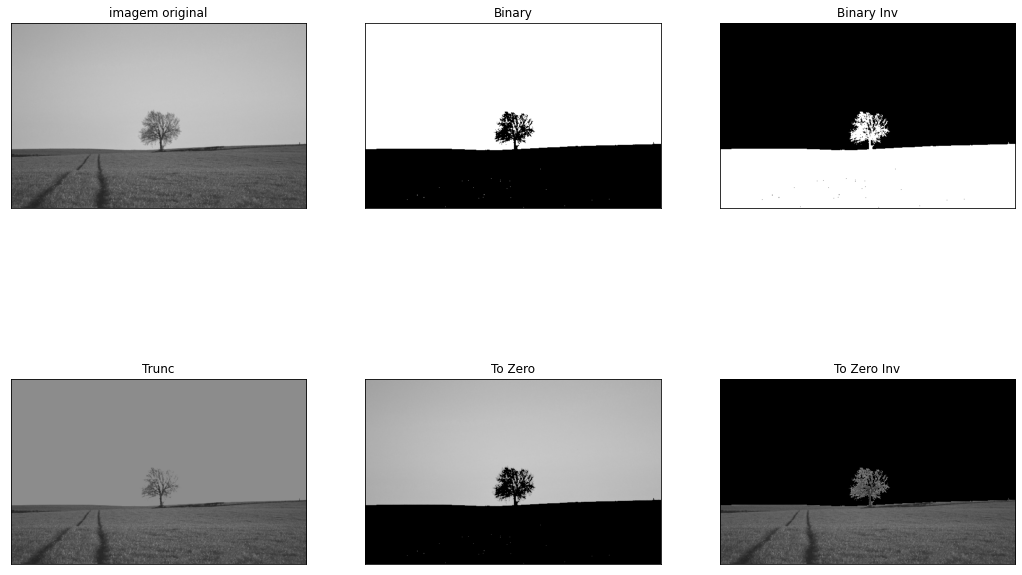

In [43]:
exibir_lim(gray, 140)

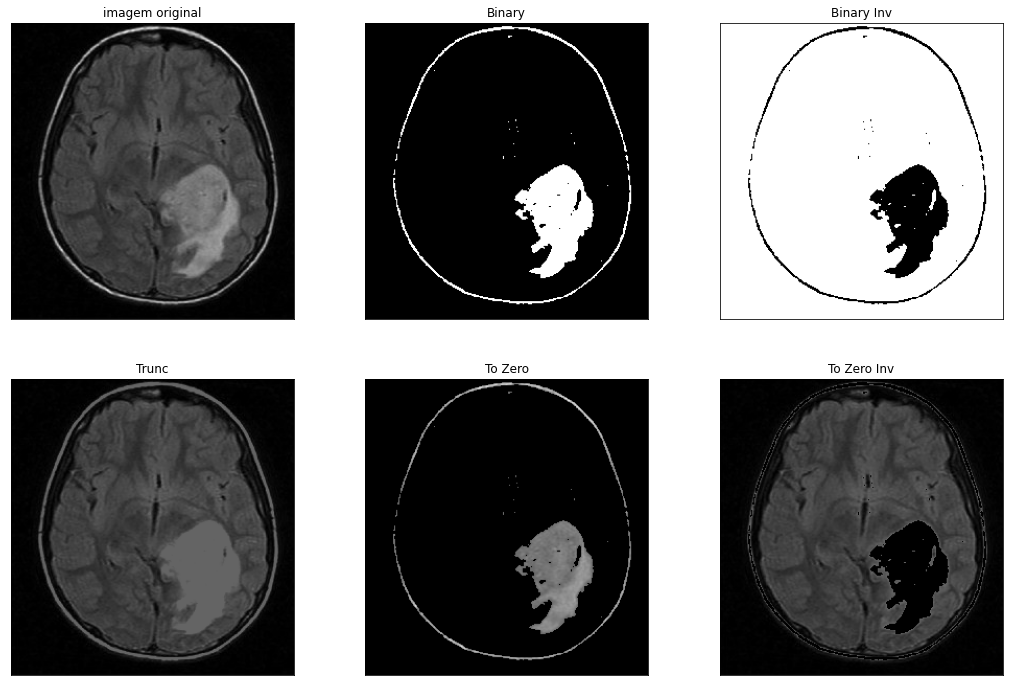

In [48]:
img = cv.imread('ct-scan.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

limiar = 100

exibir_lim(gray, limiar)

Testes com as imagens thermal01.jpg e thermal02.jpg

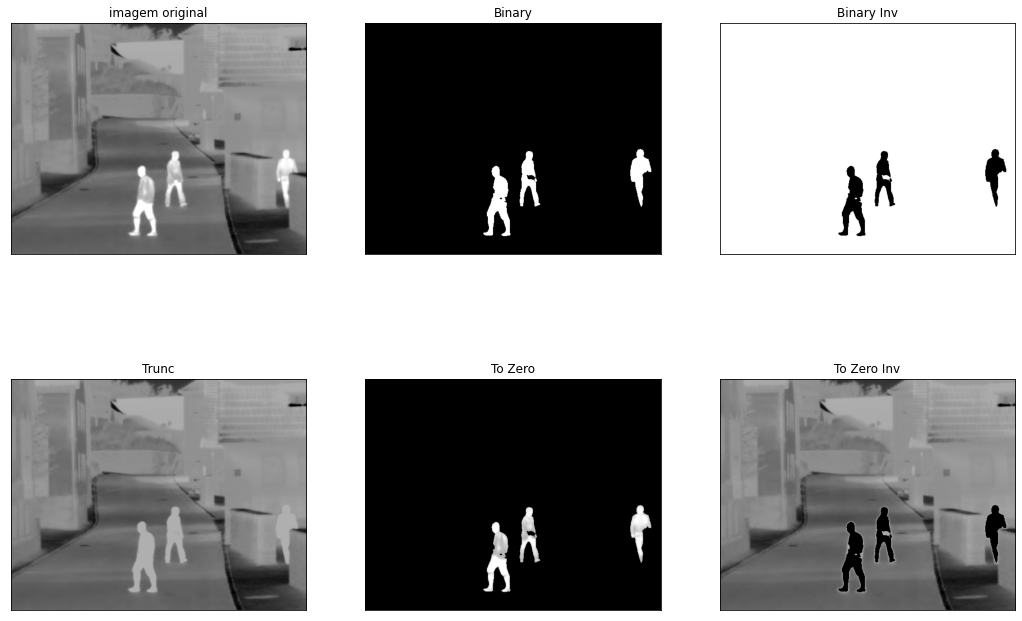

In [58]:
img = cv.imread('thermal01.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

exibir_lim(gray, 175)

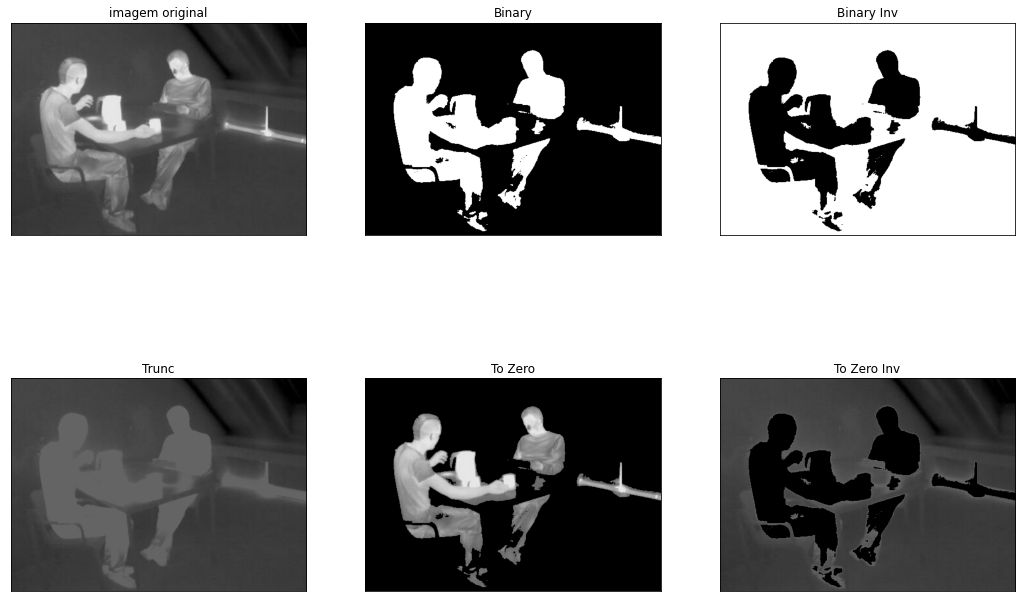

In [61]:
img = cv.imread('thermal02.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

exibir_lim(gray, 100)

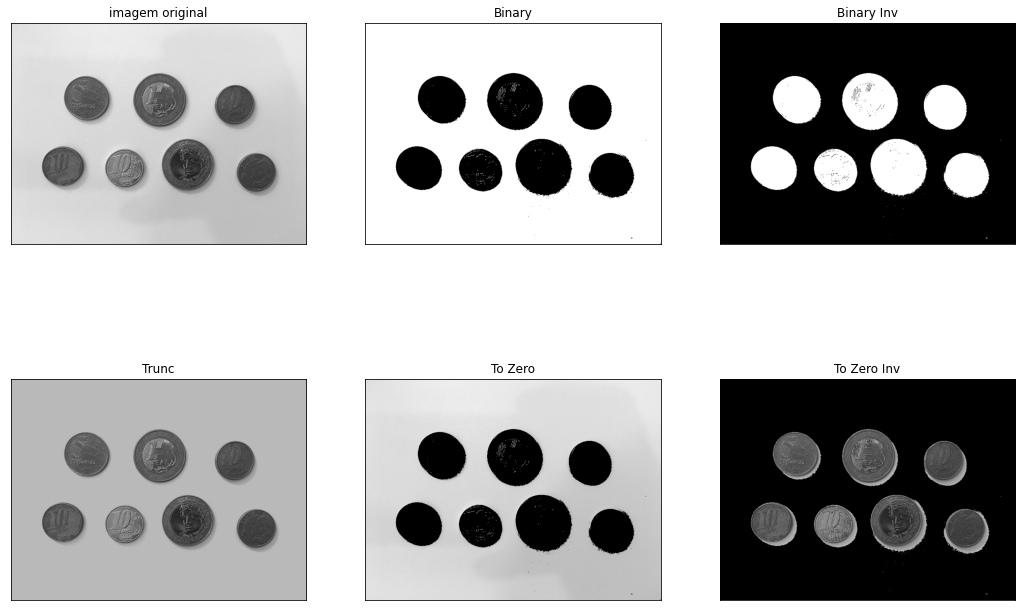

In [70]:
img = cv.imread('moedas01.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

exibir_lim(gray, 185)

Método de Otsu's

Valor de limiar de Otsu:  136.0


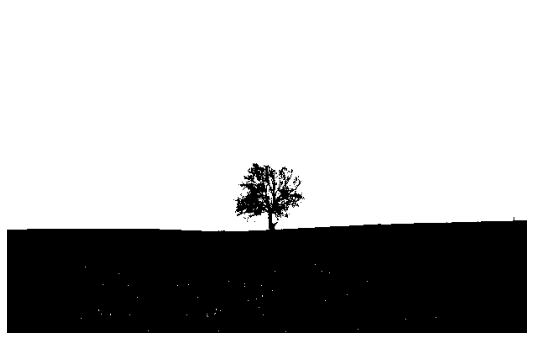

In [73]:
img = cv.imread('paisagem01.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

valor, otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
print(f"Valor de limiar de Otsu: ", valor)

mostrar(otsu)

Histograma 

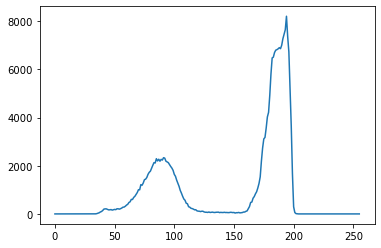

In [79]:
histograma, bins = np.histogram(gray, 256, [0,256])
plt.plot(histograma);

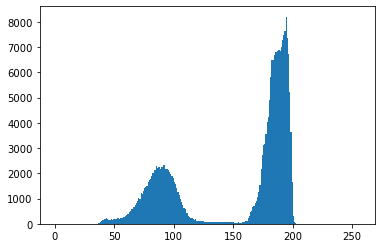

In [84]:
histograma = gray.ravel()
plt.hist(histograma, 256, [0,256]);

Melhorando a segmentação

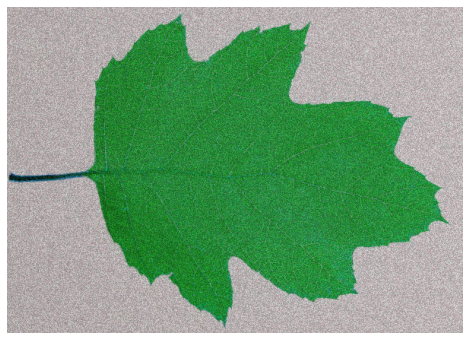

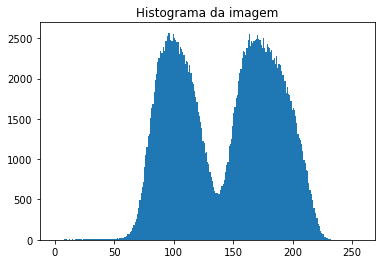

In [87]:
img = cv.imread('folha_ruido.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
mostrar(img)
plt.hist(gray.ravel(), 256, [0,256])
fig.set_size_inches(12,6)
plt.title("Histograma da imagem")
plt.show()


Valor do limiar:  139.0


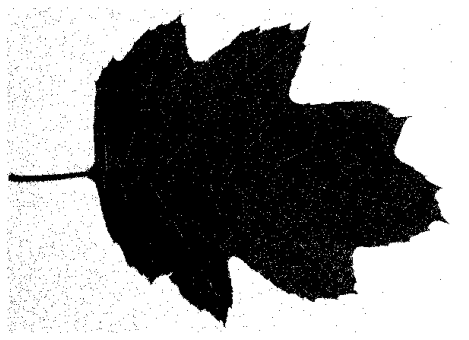

In [92]:
valor, otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
print("Valor do limiar: ", valor)
mostrar(otsu)

Filtro de desfoque gaussiano

Valor do limiar:  139.0


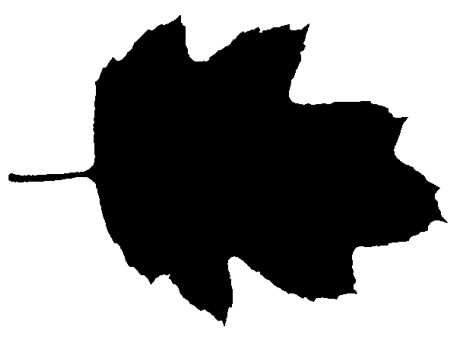

In [93]:
desfoque = cv.GaussianBlur(gray, (5,5), 0)
filtro_otsu(desfoque)

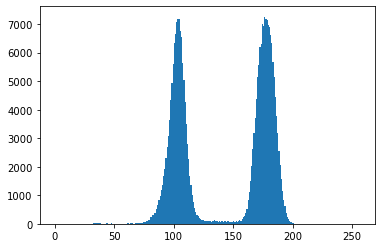

In [95]:
plt.hist(desfoque.ravel(), 256, [0,256]);

Limiarização adaptativa Média

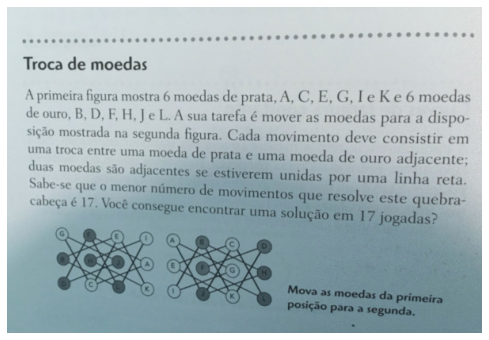

In [6]:
img = cv.imread('livro-texto.jpg')
mostrar(img)

175.0


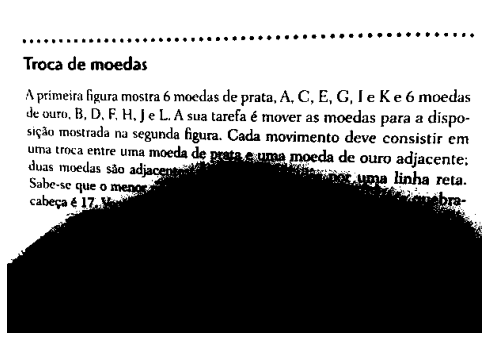

In [7]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

valor, otsu = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
print(valor)
mostrar(otsu)

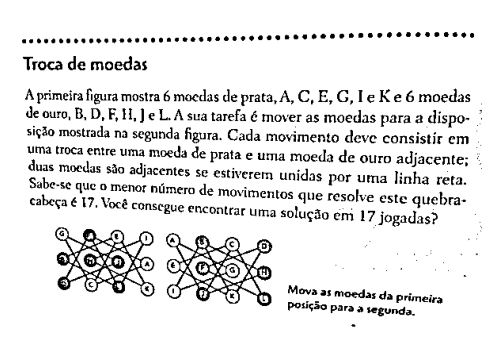

In [21]:
adptative_media = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 9)

mostrar(adptative_media)

Limiarização Adaptativa Gaussiana

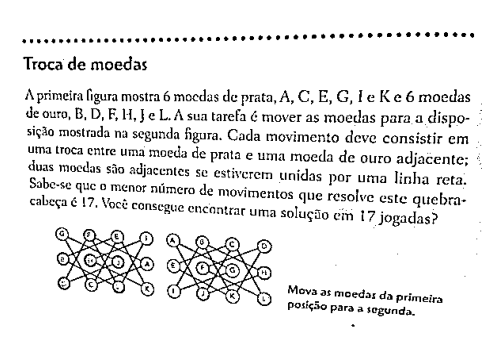

In [24]:
adapt_gauss = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 9)
mostrar(adapt_gauss)

In [28]:
def limiarizacao_adaptativa(img, limiar = 140, block_size = 11, c = 9):
    _, limiar_global = cv.threshold(img, limiar, 255, cv.THRESH_BINARY)
    limiar_media = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, block_size, c)
    limiar_gauss = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, block_size, c)
    
    imagens = [img, limiar_global, limiar_media, limiar_gauss]
    titulos = ["Imagem Original", "Limiarização Global", "Limiarização Adaptativa - Média", "Limiarização Adaptativa - Gaussiana"]

    fig = plt.gcf()
    fig.set_size_inches(18, 12)

    for i in range(4):
        plt.subplot(2,2, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB), cmap='gray')
        plt.title(titulos[i])
        plt.xticks([]), plt.yticks([])

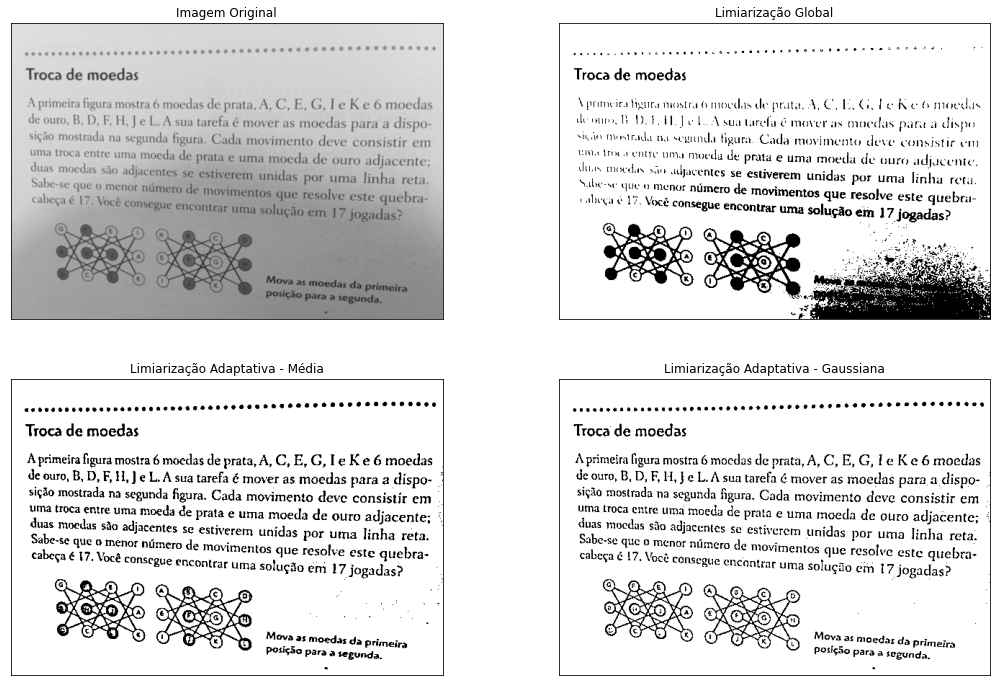

In [29]:
limiarizacao_adaptativa(gray)

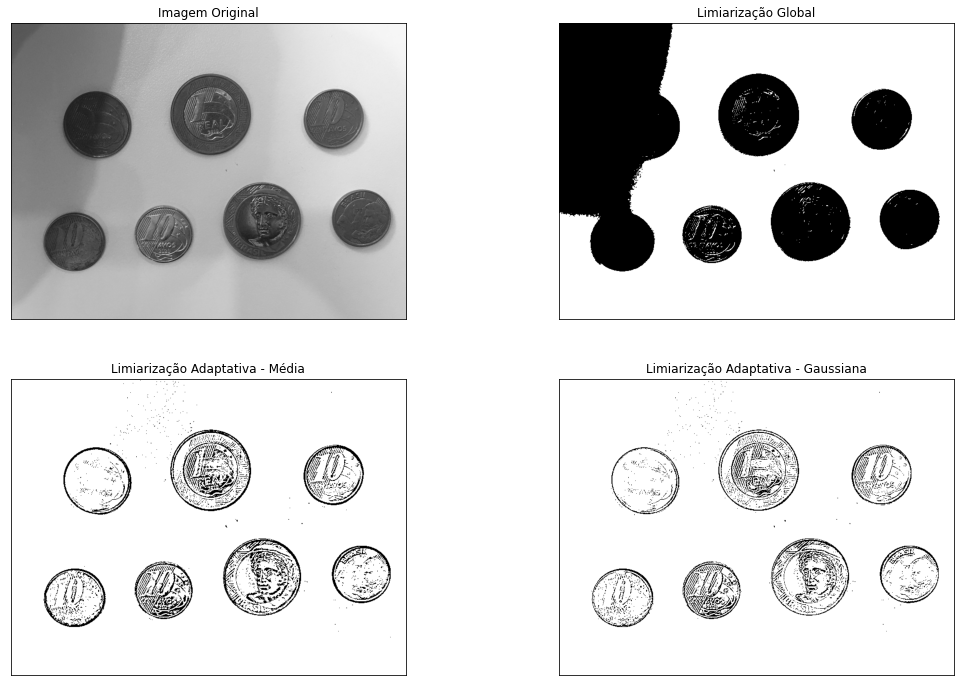

In [30]:
img = cv.imread('moedas02.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

limiarizacao_adaptativa(gray)